In [1]:
import pandas as pd
import logging
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dataset_df = pd.read_csv('./local_data/TB_Burden_Country.csv')

In [3]:
dataset_df.shape

(5120, 47)

In [4]:
dataset_df

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,...,511.00,460.00,566.00,66000.0,59000.0,73000.0,NaN,50.0,45.0,54.0
5116,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,...,487.00,433.00,545.00,64000.0,57000.0,71000.0,NaN,53.0,48.0,59.0
5117,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,...,448.00,403.00,502.00,60000.0,54000.0,67000.0,NaN,48.0,43.0,53.0
5118,Zimbabwe,ZW,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,...,411.00,362.00,471.00,56000.0,50000.0,65000.0,NaN,45.0,40.0,52.0


In [5]:
dataset_df.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [6]:
dataset_df.dtypes

Country or territory name                                                                          object
ISO 2-character country/territory code                                                             object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms) per 100 000 population, low bound                          float64
Estimated prevalence of TB (all forms) per 100

In [7]:
int_cols = dataset_df.select_dtypes(include='int64').columns

In [8]:
int_cols

Index(['ISO numeric country/territory code', 'Year',
       'Estimated total population number'],
      dtype='object')

In [9]:
duplicates = dataset_df.duplicated()
print(duplicates)
dataset_df[dataset_df.duplicated(keep=False)]

0       False
1       False
2       False
3       False
4       False
        ...  
5115    False
5116    False
5117    False
5118    False
5119    False
Length: 5120, dtype: bool


,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"


In [10]:
null_value = dataset_df.isnull().sum()
print(null_value)

Country or territory name                                                                            0
ISO 2-character country/territory code                                                              24
ISO 3-character country/territory code                                                               0
ISO numeric country/territory code                                                                   0
Region                                                                                               0
Year                                                                                                 0
Estimated total population number                                                                    0
Estimated prevalence of TB (all forms) per 100 000 population                                        0
Estimated prevalence of TB (all forms) per 100 000 population, low bound                            20
Estimated prevalence of TB (all forms) per 100 000 population, high bound

In [11]:
row_with_missing_values = dataset_df[dataset_df.isna().any(axis=1)]
print(row_with_missing_values)
null_vals = dataset_df.isnull().sum()

     Country or territory name ISO 2-character country/territory code  \
0                  Afghanistan                                     AF   
1                  Afghanistan                                     AF   
2                  Afghanistan                                     AF   
3                  Afghanistan                                     AF   
4                  Afghanistan                                     AF   
...                        ...                                    ...   
5115                  Zimbabwe                                     ZW   
5116                  Zimbabwe                                     ZW   
5117                  Zimbabwe                                     ZW   
5118                  Zimbabwe                                     ZW   
5119                  Zimbabwe                                     ZW   

     ISO 3-character country/territory code  \
0                                       AFG   
1                            

In [12]:
dataset_df.drop('Method to derive TBHIV estimates', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive per 100 000 population', axis = 1, inplace = True)
dataset_df.drop('Estimated HIV in incident TB (percent), high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated HIV in incident TB (percent), low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated HIV in incident TB (percent)', axis = 1, inplace = True)
dataset_df.drop('Method to derive incidence estimates', axis = 1, inplace = True)
dataset_df.drop('Estimated number of deaths from TB in people who are HIV-positive, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated number of deaths from TB in people who are HIV-positive, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound', axis = 1, inplace = True)
dataset_df.drop('ISO 2-character country/territory code', axis = 1, inplace = True)
dataset_df.drop('Estimated prevalence of TB (all forms) per 100 000 population, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated prevalence of TB (all forms) per 100 000 population, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated prevalence of TB (all forms), low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated prevalence of TB (all forms), high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence (all forms) per 100 000 population, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence (all forms) per 100 000 population, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated number of incident cases (all forms), low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated number of incident cases (all forms), high bound', axis = 1, inplace = True)
dataset_df.drop('Case detection rate (all forms), percent', axis = 1, inplace = True)
dataset_df.drop('Case detection rate (all forms), percent, low bound', axis = 1, inplace = True)
dataset_df.drop('Case detection rate (all forms), percent, high bound', axis = 1, inplace = True)

In [13]:
dataset_df.dtypes

Country or territory name                                                                          object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms)                                                            float64
Method to derive prevalence estimates                                                              object
Estimated mortality of TB cases (all forms, ex

In [14]:
null_value = dataset_df.isnull().sum()
print(null_value)

Country or territory name                                                                         0
ISO 3-character country/territory code                                                            0
ISO numeric country/territory code                                                                0
Region                                                                                            0
Year                                                                                              0
Estimated total population number                                                                 0
Estimated prevalence of TB (all forms) per 100 000 population                                     0
Estimated prevalence of TB (all forms)                                                            0
Method to derive prevalence estimates                                                             0
Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population                 0


In [15]:
print(all(np.where(dataset_df['Year']>0, True, False)))
print(all(np.where(dataset_df['ISO numeric country/territory code']>0, True, False)))
print(all(np.where(dataset_df['Estimated total population number']>0, True, False)))

True
True
True


In [16]:
df_floats = dataset_df.select_dtypes(include='float64').columns
print(df_floats)

Index(['Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms)',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       'Estimated number of deaths from TB (all forms, excluding HIV)',
       'Estimated number of deaths from TB (all forms, excluding HIV), low bound',
       'Estimated number of deaths from TB (all forms, excluding HIV), high bound',
       'Estimated mortality of TB cases who are HIV-positive, per 100 000 population',
       'Estimated number of deaths from TB in people who are HIV-positive',
       'Estimated incidence (all forms) per 100 000 population',
       'Estimated number of incident cases (all forms)'],
      dtype='object')


In [17]:
def check_all_floats(df: object, column_name: str):
    ''' Checks if all values in a column are floats '''
    value = df[column_name].apply(lambda x: isinstance(x, float)).all()
    return value
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms) per 100 000 population'))

print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms)'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB (all forms, excluding HIV)'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB (all forms, excluding HIV), low bound'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB (all forms, excluding HIV), high bound'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases who are HIV-positive, per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB in people who are HIV-positive'))
print(check_all_floats(dataset_df, 'Estimated incidence (all forms) per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated number of incident cases (all forms)'))

True
True
True
True
True
True
True
True
True
True
True
True


In [18]:
df_strings = dataset_df.select_dtypes(include='object').columns
print(df_strings)

Index(['Country or territory name', 'ISO 3-character country/territory code',
       'Region', 'Method to derive prevalence estimates',
       'Method to derive mortality estimates'],
      dtype='object')


In [19]:
def isStringColumn(df: object, column_name: str):
    is_string_column = df[column_name].apply(lambda x: isinstance(x, str)).all()
    return is_string_column
print(isStringColumn(dataset_df, 'Country or territory name'))
print(isStringColumn(dataset_df, 'ISO 3-character country/territory code'))
print(isStringColumn(dataset_df, 'Region'))
print(isStringColumn(dataset_df, 'Method to derive prevalence estimates'))
print(isStringColumn(dataset_df, 'Method to derive mortality estimates'))

True
True
True
True
True


In [20]:
dataset_df.dtypes

Country or territory name                                                                          object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms)                                                            float64
Method to derive prevalence estimates                                                              object
Estimated mortality of TB cases (all forms, ex

In [21]:
def outliersZscore (df: object, column_name: str) :
    z_score = np.abs((df[column_name] - df[column_name].mean() / df[column_name].std()))
    outliers = df[z_score<2]
    return outliers
print(outliersZscore(dataset_df, 'Estimated prevalence of TB (all forms)'))

      Country or territory name ISO 3-character country/territory code  \
168         Antigua and Barbuda                                    ATG   
169         Antigua and Barbuda                                    ATG   
534                     Bermuda                                    BMU   
536                     Bermuda                                    BMU   
537                     Bermuda                                    BMU   
...                         ...                                    ...   
4664   Turks and Caicos Islands                                    TCA   
4665   Turks and Caicos Islands                                    TCA   
4666   Turks and Caicos Islands                                    TCA   
5022  Wallis and Futuna Islands                                    WLF   
5023  Wallis and Futuna Islands                                    WLF   

      ISO numeric country/territory code Region  Year  \
168                                   28    AMR  1990 

<Axes: xlabel='Estimated prevalence of TB (all forms)'>

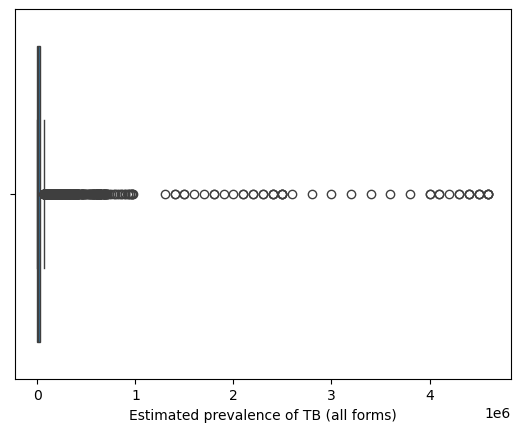

In [22]:
sns.boxplot(x=dataset_df['Estimated prevalence of TB (all forms)'])

(array([5.064e+03, 1.700e+01, 1.600e+01, 5.000e+00, 1.800e+01]),
 array([      0.,  920000., 1840000., 2760000., 3680000., 4600000.]),
 <BarContainer object of 5 artists>)

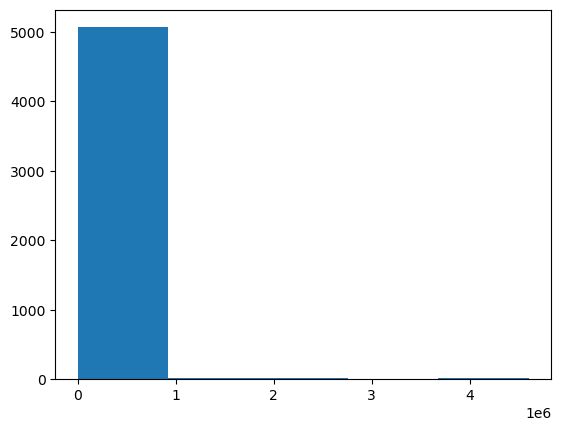

In [23]:
plt.hist(dataset_df['Estimated prevalence of TB (all forms)'], bins=5)

In [24]:
def exclude_outliers_zscore(data:object, column:str) -> 'str':
    z_score = np.abs((data[column] - data[column].mean() / data[column].std()))
    df_excl_outliers = data[(z_score>=2)]
    return df_excl_outliers
print(exclude_outliers_zscore(dataset_df, 'Estimated prevalence of TB (all forms)'))
df_excl_outliers = exclude_outliers_zscore(dataset_df, 'Estimated prevalence of TB (all forms)')
hiv_df_excl_outliers = exclude_outliers_zscore(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population')
dataset_df = df_excl_outliers
dataset_df = hiv_df_excl_outliers

     Country or territory name ISO 3-character country/territory code  \
0                  Afghanistan                                    AFG   
1                  Afghanistan                                    AFG   
2                  Afghanistan                                    AFG   
3                  Afghanistan                                    AFG   
4                  Afghanistan                                    AFG   
...                        ...                                    ...   
5115                  Zimbabwe                                    ZWE   
5116                  Zimbabwe                                    ZWE   
5117                  Zimbabwe                                    ZWE   
5118                  Zimbabwe                                    ZWE   
5119                  Zimbabwe                                    ZWE   

      ISO numeric country/territory code Region  Year  \
0                                      4    EMR  1990   
1        

(array([4900.,   15.,   16.,    5.,   18.]),
 array([2.30000000e+00, 9.20001840e+05, 1.84000138e+06, 2.76000092e+06,
        3.68000046e+06, 4.60000000e+06]),
 <BarContainer object of 5 artists>)

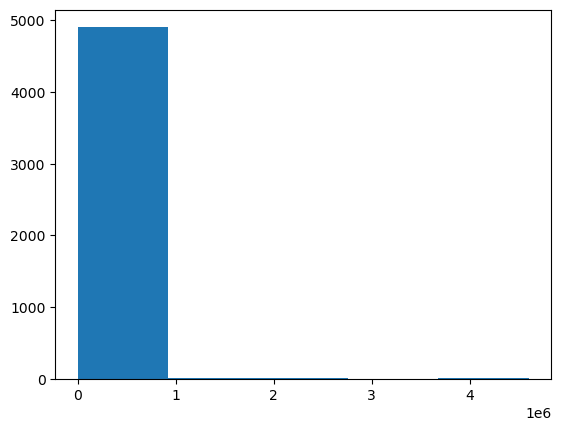

In [25]:
plt.hist(df_excl_outliers['Estimated prevalence of TB (all forms)'], bins=5)

<Axes: xlabel='Estimated prevalence of TB (all forms)'>

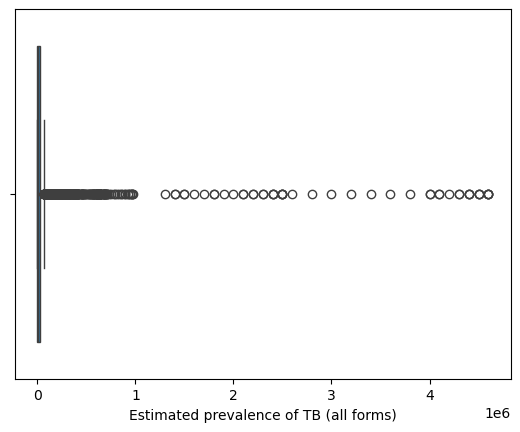

In [26]:
sns.boxplot(x=df_excl_outliers['Estimated prevalence of TB (all forms)'])

In [27]:
df_excl_outliers.describe(include='all')

,Country or territory name,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Estimated prevalence of TB (all forms),Method to derive prevalence estimates,"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population",Estimated number of deaths from TB in people who are HIV-positive,Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,Estimated number of incident cases (all forms)
count,4954,4954,4954.000000,4954,4954.000000,4.954000e+03,4954.000000,4.954000e+03,4954,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954,4954.000000,4.954000e+03
unique,218,218,NaN,6,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,Afghanistan,AFG,NaN,EUR,NaN,NaN,NaN,NaN,predicted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VR,NaN,NaN
freq,24,24,NaN,1240,NaN,NaN,NaN,NaN,4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2129,NaN,NaN
mean,NaN,NaN,432.061365,NaN,2001.512111,3.013292e+07,200.527614,6.877303e+04,NaN,20.753599,13.740692,28.200416,7093.977235,4874.570941,9406.113333,12.225382,1859.002586,NaN,139.055733,4.360200e+04
std,NaN,NaN,255.471742,NaN,6.925722,1.202176e+08,261.080015,3.301170e+05,NaN,33.265669,22.576935,45.097515,31036.081755,21044.702957,42588.586413,46.139222,8040.279830,NaN,191.652008,1.895082e+05
min,NaN,NaN,4.000000,NaN,1990.000000,1.426000e+03,1.200000,2.300000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00
25%,NaN,NaN,212.000000,NaN,1995.000000,8.206685e+05,26.000000,4.600000e+02,NaN,1.500000,0.992500,1.800000,22.000000,15.000000,27.000000,0.000000,0.000000,NaN,20.000000,3.400000e+02
50%,NaN,NaN,428.000000,NaN,2002.000000,5.416784e+06,94.000000,5.300000e+03,NaN,5.700000,4.000000,8.500000,320.000000,200.000000,390.000000,0.070000,8.000000,NaN,65.000000,3.800000e+03
75%,NaN,NaN,646.000000,NaN,2008.000000,1.855006e+07,285.000000,2.800000e+04,NaN,26.000000,17.000000,35.000000,2400.000000,1600.000000,3000.000000,2.400000,290.000000,NaN,189.000000,1.900000e+04


In [28]:
df_excl_outliers.columns

Index(['Country or territory name', 'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms)',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       'Estimated number of deaths from TB (all forms, excluding HIV)',
       'Estimated number of deaths from TB (all forms, excluding HIV), low bound',
       'Estimated number of deaths from TB (all forms, excluding HIV), high bound',
       'Estimated mortality of TB cases who are HIV-positive, per 100 000 population',
       'Estimated n

In [29]:
df_excl_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 0 to 5119
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       4954 non-null   object 
 1   ISO 3-character country/territory code                                                          4954 non-null   object 
 2   ISO numeric country/territory code                                                              4954 non-null   int64  
 3   Region                                                                                          4954 non-null   object 
 4   Year                                                                                            4954 non-null   int64  
 5   Estimated total po

In [30]:
df_numbers = df_excl_outliers.drop(columns=['Country or territory name', 'ISO 3-character country/territory code',
                                            'Region', 'Method to derive prevalence estimates', 'Method to derive mortality estimates'], axis=1)
df_numbers.shape

(4954, 15)

In [31]:
df_numbers

,ISO numeric country/territory code,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Estimated prevalence of TB (all forms),"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population",Estimated number of deaths from TB in people who are HIV-positive,Estimated incidence (all forms) per 100 000 population,Estimated number of incident cases (all forms)
0,4,1990,11731193,306.0,36000.0,37.0,24.0,54.0,4300.0,2800.0,6400.0,0.04,5.0,189.0,22000.0
1,4,1991,12612043,343.0,43000.0,46.0,29.0,61.0,5800.0,3700.0,7700.0,0.06,8.0,191.0,24000.0
2,4,1992,13811876,371.0,51000.0,54.0,34.0,68.0,7400.0,4700.0,9400.0,0.08,11.0,191.0,26000.0
3,4,1993,15175325,392.0,59000.0,60.0,38.0,73.0,9100.0,5800.0,11000.0,0.11,17.0,189.0,29000.0
4,4,1994,16485018,410.0,68000.0,65.0,41.0,79.0,11000.0,6800.0,13000.0,0.13,22.0,188.0,31000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,716,2009,12888918,449.0,58000.0,39.0,27.0,52.0,5000.0,3500.0,6700.0,206.00,27000.0,673.0,87000.0
5116,716,2010,13076978,415.0,54000.0,36.0,25.0,48.0,4700.0,3300.0,6300.0,196.00,26000.0,635.0,83000.0
5117,716,2011,13358738,417.0,56000.0,38.0,26.0,51.0,5100.0,3500.0,6800.0,176.00,24000.0,602.0,80000.0
5118,716,2012,13724317,425.0,58000.0,41.0,27.0,55.0,5600.0,3700.0,7500.0,160.00,22000.0,575.0,79000.0


In [32]:
grouped_data = dataset_df.groupby('Estimated prevalence of TB (all forms)')['Year'].apply(list)
hiv_grouped_data = dataset_df.groupby('Estimated prevalence of TB (all forms)')['Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population'].apply(list)
hiv_grouped_data

Estimated prevalence of TB (all forms)
0.00                            [21.0]
0.07                            [21.0]
0.33                            [21.0]
0.41                             [3.9]
0.44                        [4.2, 4.1]
                        ...           
4200000.00                      [38.0]
4300000.00                [38.0, 37.0]
4400000.00          [38.0, 38.0, 38.0]
4500000.00          [38.0, 39.0, 39.0]
4600000.00    [39.0, 39.0, 39.0, 39.0]
Name: Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population, Length: 513, dtype: object

In [33]:
import scipy.stats as stats
f_statistic, p_value=stats.f_oneway(*grouped_data)

print('this is our f-stat: ', f_statistic)
print('this is our p_value: ', p_value)

this is our f-stat:  1.3099239386473813
this is our p_value:  1.9981573964785423e-05


In [34]:
hiv_f_statistic, hiv_p_value=stats.f_oneway(*hiv_grouped_data)

print('this is our f-stat: ', hiv_f_statistic)
print('this is our p_value: ', hiv_p_value)

this is our f-stat:  2.401360619569274
this is our p_value:  6.547577373635143e-46


getting ready to plot


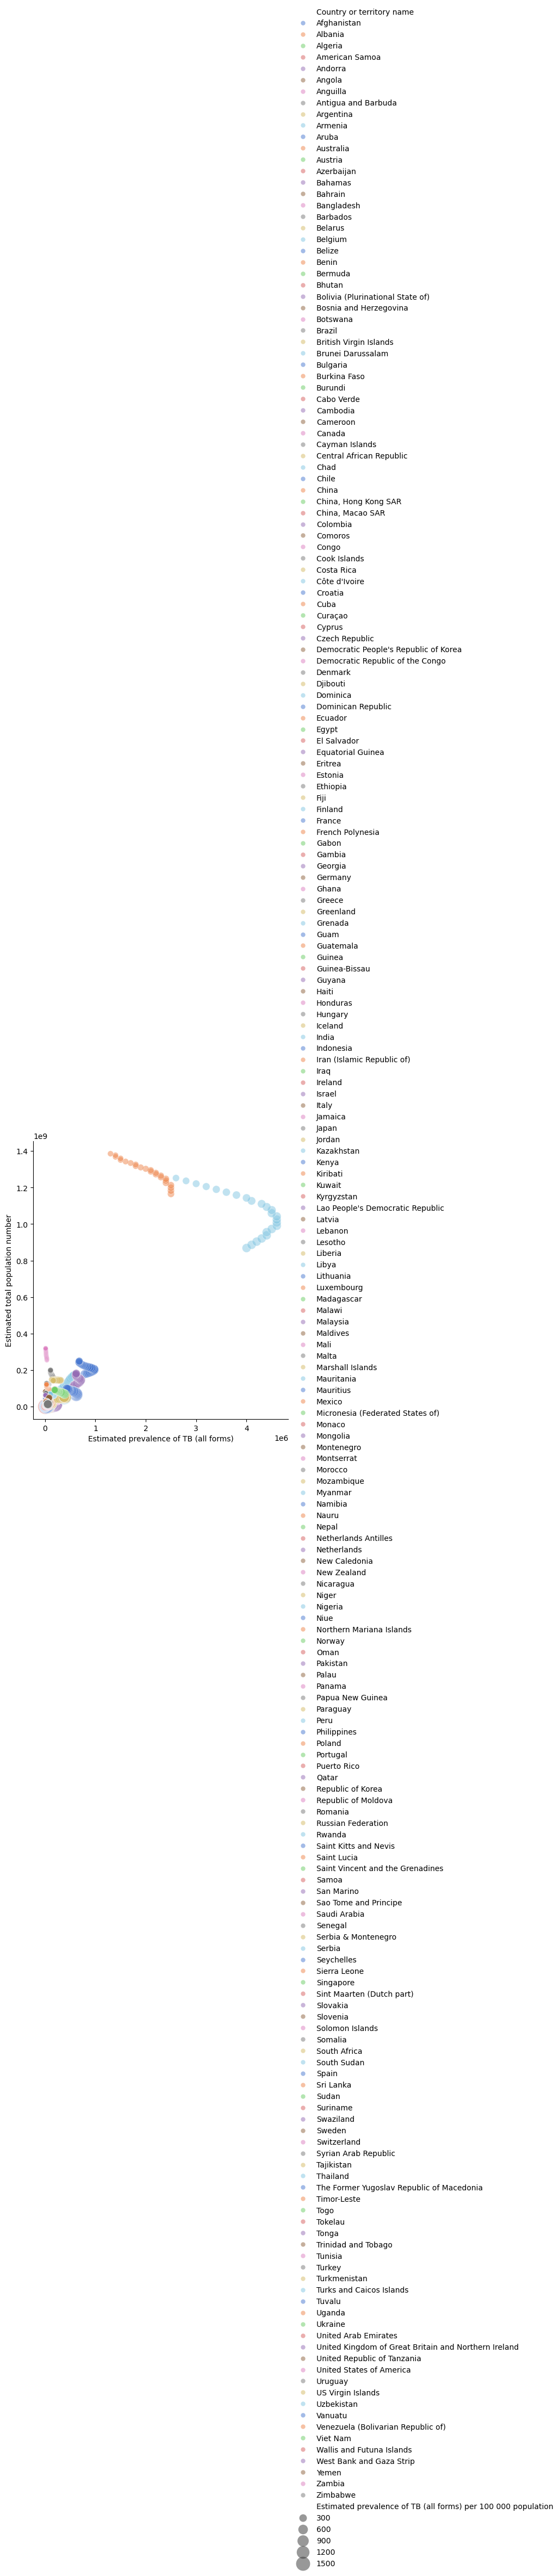

In [35]:
sns.relplot(x="Estimated prevalence of TB (all forms)", y="Estimated total population number", hue="Country or territory name", size="Estimated prevalence of TB (all forms) per 100 000 population", 
           sizes=(40, 400), alpha=.5, palette='muted', height=6, data=df_excl_outliers)
print('getting ready to plot')

<Axes: xlabel='Estimated prevalence of TB (all forms)', ylabel='Year'>

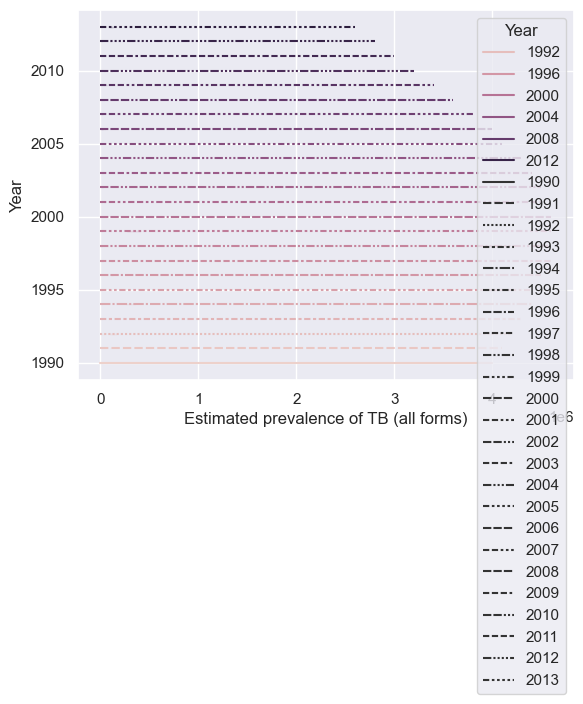

In [36]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Estimated prevalence of TB (all forms)", y="Year",
             hue="Year", style="Year",
             data=df_excl_outliers)

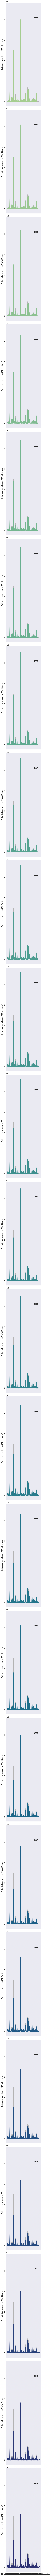

In [37]:
sns.set_theme(style="dark")
g = sns.relplot(
    data=df_excl_outliers,
    x="Country or territory name", y="Estimated prevalence of TB (all forms)", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=5, zorder=1000000,
    col_wrap=1, height=10, aspect=0.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_excl_outliers, x="Country or territory name", y="Estimated prevalence of TB (all forms)", units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Estimated prevalence of TB (all forms)")
g.tight_layout()

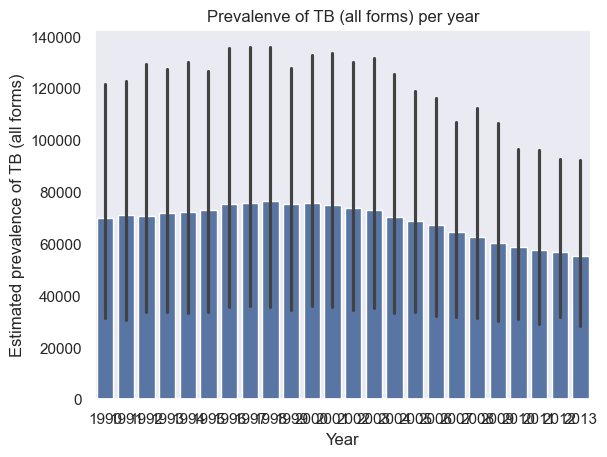

In [38]:
sns.barplot(x="Year", y="Estimated prevalence of TB (all forms)", data=df_excl_outliers)
plt.title("Prevalenve of TB (all forms) per year")
plt.show()

In [82]:
dataset_df.to_csv('final_dataset.csv', index=False)

In [39]:
#The dataset is a observational study of all the Tuberculosis cases 
#in each country from 1990 to 2013, the mortality rates, and effects of HIV in a Turberculosis case.
#To clean the dataset I first removed all duplicate rows in the data if they were present.
#Then I removed all of the null values in the dataset by removing all columns that had null values.
#Then I checked if all columns had valid data types present in each column and the data was consistent.
#After that I checked to see if there were any outliers present in the data that I wanted visualize
#and if so I removed the outliers prior to data visualization.
#To summarize the data I first explored the data that excluded any outliers present in the data by creating histograms, 
#box and whisker plots, and analyzing the data in a table.
#I also wanted to see the shape of the df_excl_outliers dataet and see how many rows actually excluded, however, I found that not many were excluded.
#I then excluded all String columns and put the output in to a new dataset that only had the numerical columns.
#Then I grouped the data of the Estimated prevalence of TB (all forms) column and the year column to see if there was any coorelation
#between the two.
#I used multiple seaborne graphs and functions to better help visualize the data and I found that the height of TB cases was during the 1990's, especially
#in 1997 which had one country having the highest recorded cases of TB compared to anybody else. As time progressed however, it slowly dwindled to nearly
#half in 2013.
#I also analyzed how specific countries may have had more cases than others and after plugging the necessary columns I found that two countries
#had the most TB cases out of every other country and how through time the cases began to subside.
#To summarize the findings, I found that the height of TB cases was during the 1990's and had its peak in 1997 and in recent years it had slowly decreased
#to nearly half of what its height was in 1997.
#I also found that two countries in the dataset had a higher percentage of TB cases to every other country and region in the dataset.